### **Utils**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.spatial.distance import cdist

In [2]:
def plot_points(X, org_labels, predicted_labels, centroids):
    fig, axes = plt.subplots(1, 2, figsize = (15, 7))
    K = len(np.unique(org_labels))
    colors = plt.cm.Set1(np.linspace(0, 1, K))
    
    for cls in np.unique(org_labels):
        idx = org_labels == cls
        axes[0].scatter(X[idx, 0], X[idx, 1], color = colors[cls], label = f"Class {cls}")
    axes[0].set_xlabel("x1")
    axes[0].set_ylabel("x2")
    axes[0].set_title("Original Labels")
    axes[0].legend()
    
    for cls in np.unique(predicted_labels):
        idx = predicted_labels == cls
        axes[1].scatter(X[idx, 0], X[idx, 1], color = colors[cls], label=f"Cluster {cls}")
        axes[1].scatter(centroids[cls, 0], centroids[cls, 1], color=colors[cls],
                s=200, marker="^", linewidths=2, edgecolors="black")
    
    axes[1].set_xlabel("x1")
    axes[1].set_ylabel("x2")
    axes[1].set_title("KMeans Clustering Result")
    axes[1].legend()

    plt.show()


In [ ]:
def plot_kmeans_iterations(X, centroids, labels, K):
    n_iterations = len(labels)
    
    # Create a color map
    colors = plt.cm.Set1(np.linspace(0, 1, K))
    
    # Calculate grid dimensions
    cols = 3
    rows = (n_iterations + cols - 1) // cols
    
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5*rows))
    fig.suptitle(f'K-means Training Loop (K={K}, {n_iterations} iterations)', fontsize=16, fontweight='bold')
    
    # Flatten axes array for easier indexing
    if n_iterations == 1:
        axes = [axes]
    else:
        axes = axes.flatten() if rows > 1 else axes
    
    for it in range(n_iterations):
        ax = axes[it]
        
        # Plot data points colored by cluster
        for k in range(K):
            cluster_points = X[labels[it] == k]
            ax.scatter(cluster_points[:, 0], cluster_points[:, 1], 
                      c=[colors[k]], alpha=0.6, s=30, label=f'Cluster {k+1}')
        
        # Plot centroids
        current_centroids = centroids[it+1]  # +1 because centroids[0] is initial
        ax.scatter(current_centroids[:, 0], current_centroids[:, 1], 
                  c='black', marker='X', s=200, edgecolors='white', linewidths=2, 
                  label='Centroids', zorder=5)
        
        # Add iteration number
        ax.set_title(f'Iteration {it+1}', fontsize=12, fontweight='bold')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.grid(True, alpha=0.3)
        
        if it == 0:
            ax.legend(loc='best', fontsize=8)
    
    # Hide unused subplots
    for it in range(n_iterations, len(axes)):
        axes[it].axis('off')
    
    plt.tight_layout()
    plt.show()

In [4]:
def kmeans_init_centroids(X, k):
    centroids = X[np.random.choice(X.shape[0], k)]   #(K, n_cols)
    return centroids

def kmeans_assign_labels(X, centroids):
    D = cdist(X, centroids) #Khoang cach moi diem den moi centroid
    return np.argmin(D, axis = 1) #Gan cho centroid co khoang cach nho nhat

def kmeans_update_centroids(X, labels, K):
    centroids = np.zeros((K, X.shape[1]))
    for k in range(K):
        Xk = X[labels==k, :]
        centroids[k, :] = np.mean(Xk, axis = 0)
    return centroids

def has_converged(centroids, new_centroids):
    return (set([tuple(a) for a in centroids])) == (set([tuple(a) for a in new_centroids]))

In [5]:
def kmeans(X, K):
    centroids = [kmeans_init_centroids(X, K)]
    labels = []
    it = 0
    while True:
        prev_centroids = centroids[-1]
        labels.append(kmeans_assign_labels(X, centroids[-1]))
        centroids.append(kmeans_update_centroids(X, labels[-1], K))
        it += 1
        if has_converged(prev_centroids, centroids[-1]):
            break
        
    return (centroids, labels, it)

### **Assignment 1:**

- Generate a toy dataset having $600$ data points, $200$ points of them following the Gaussian distribution $\mathcal{N}((2, 2), \Sigma)$, $200$ points of them following the Gaussian distribution $\mathcal{N}((8, 3), \Sigma)$, and $200$ points of them following the Gaussian distribution $\mathcal{N}((3, 6), \Sigma)$ where $\Sigma = 
\left(\begin{array}{cc}
    1 & 0 \\
    0 & 1
\end{array}\right)
$.
- Use Numpy only to implement the K-means method for finding three clusters from the toy dataset.
- Train this K-means with EM method.
- Give comments on the effect of intializing centroids randomly to the overall performance of K-means.

In [6]:
means = [[2,2], [8,3], [3,6]]
cov = [[1,0], [0,1]]
N1 = N2 = N3 = 200
K = 3

X0 = np.random.multivariate_normal(mean = means[0], cov = cov, size = N1)
X1 = np.random.multivariate_normal(mean = means[1], cov = cov, size = N2)
X2 = np.random.multivariate_normal(mean = means[2], cov = cov, size = N3)

X = np.concatenate((X0, X1, X2), axis = 0)
original_label = np.asarray([0]*N1 + [1]*N2 + [2]*N3).T

In [28]:
n_tries = 5
tries = []

for i in range(n_tries):
    centroids, labels, it = kmeans(X, K)
    tries.append({
        "centroids": centroids,
        "labels": labels,
        "it": it
    })

In [29]:
for i, _try in enumerate(tries):
    print(f"Try {i+1} finished after {_try['it']} iterations")
    print(f"Try {i+1} final centroids:")
    print(_try['centroids'][-1])

Try 1 finished after 4 iterations
Try 1 final centroids:
[[1.81971104 1.91250587]
 [3.02372914 5.89504502]
 [7.96689102 3.10784939]]
Try 2 finished after 5 iterations
Try 2 final centroids:
[[1.81971104 1.91250587]
 [3.02372914 5.89504502]
 [7.96689102 3.10784939]]
Try 3 finished after 7 iterations
Try 3 final centroids:
[[2.37909777 3.90777195]
 [7.37045889 4.32237355]
 [8.17065073 2.5418458 ]]
Try 4 finished after 6 iterations
Try 4 final centroids:
[[1.81971104 1.91250587]
 [7.96689102 3.10784939]
 [3.02372914 5.89504502]]
Try 5 finished after 5 iterations
Try 5 final centroids:
[[3.02372914 5.89504502]
 [7.96689102 3.10784939]
 [1.81971104 1.91250587]]


Clustering Result for try 1


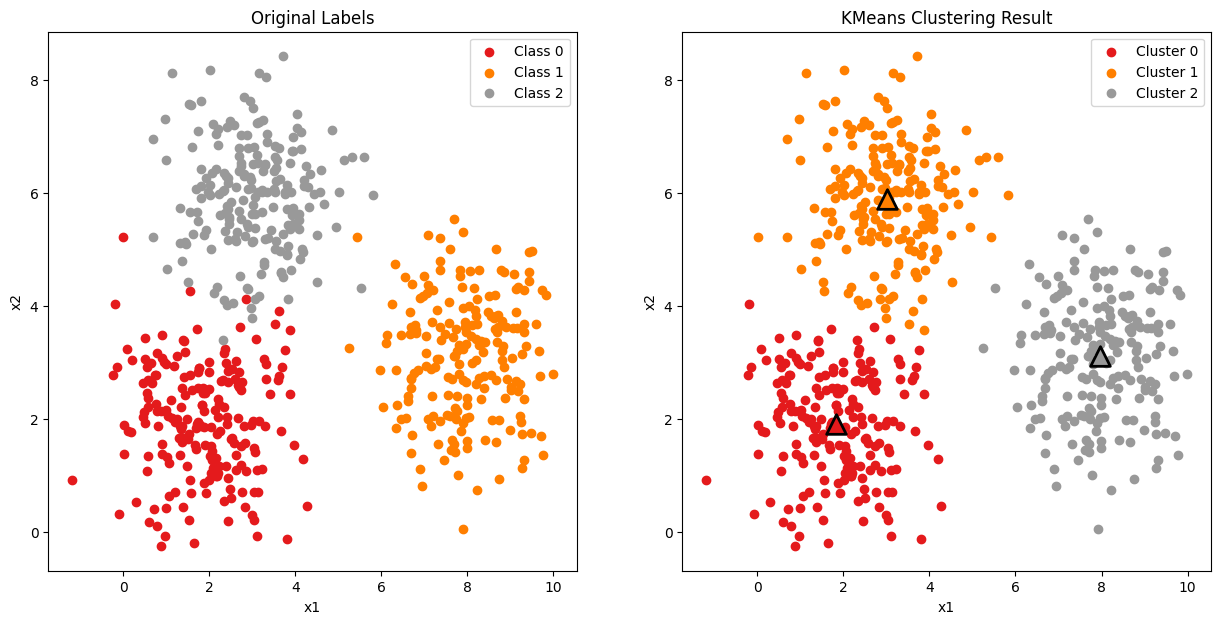

Clustering Result for try 2


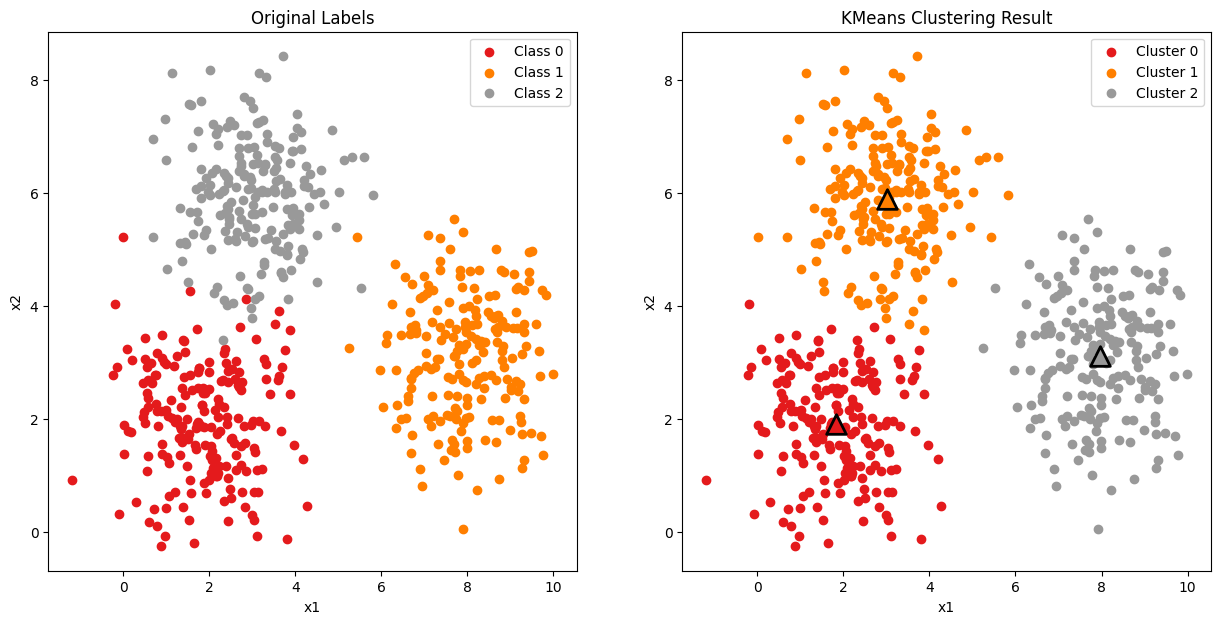

Clustering Result for try 3


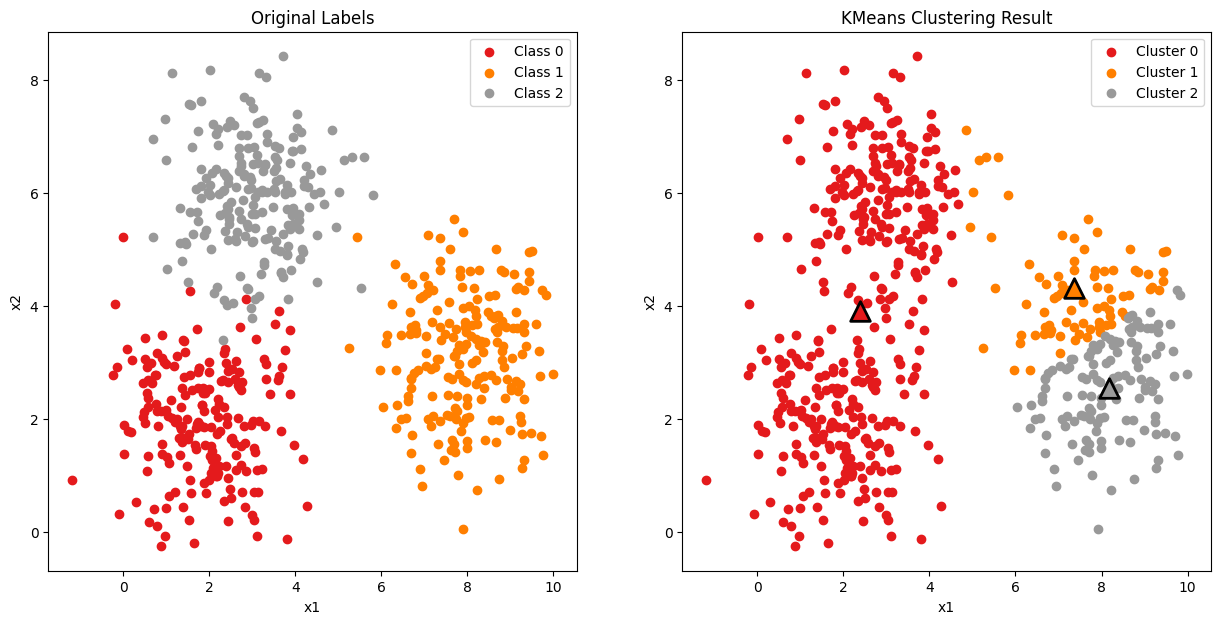

Clustering Result for try 4


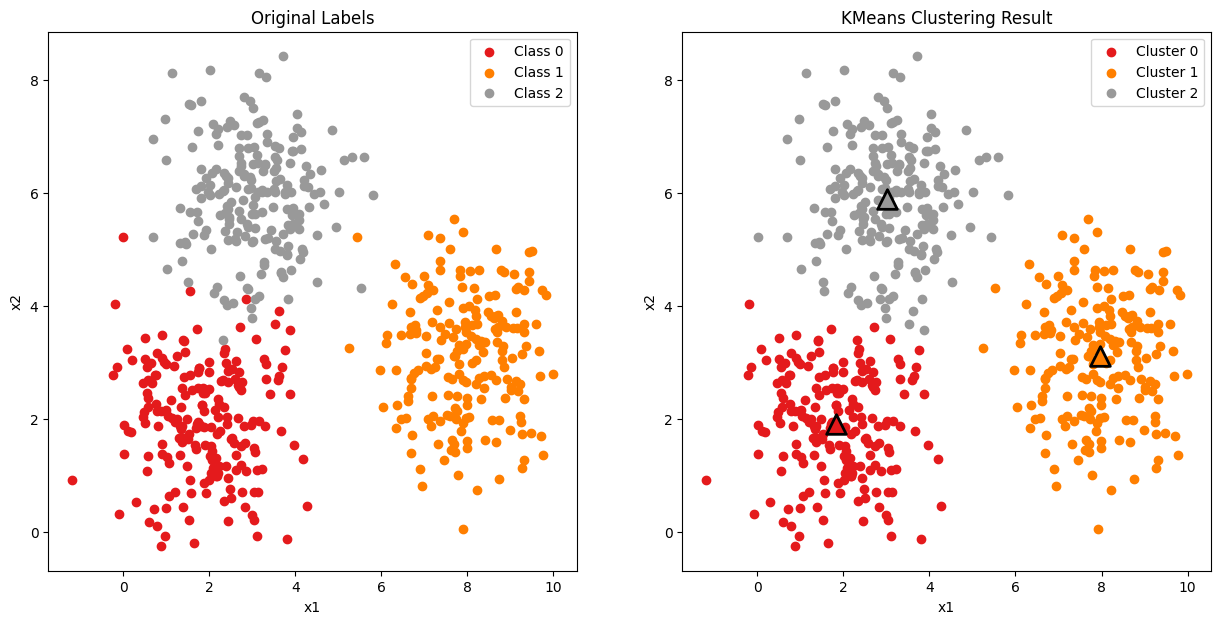

Clustering Result for try 5


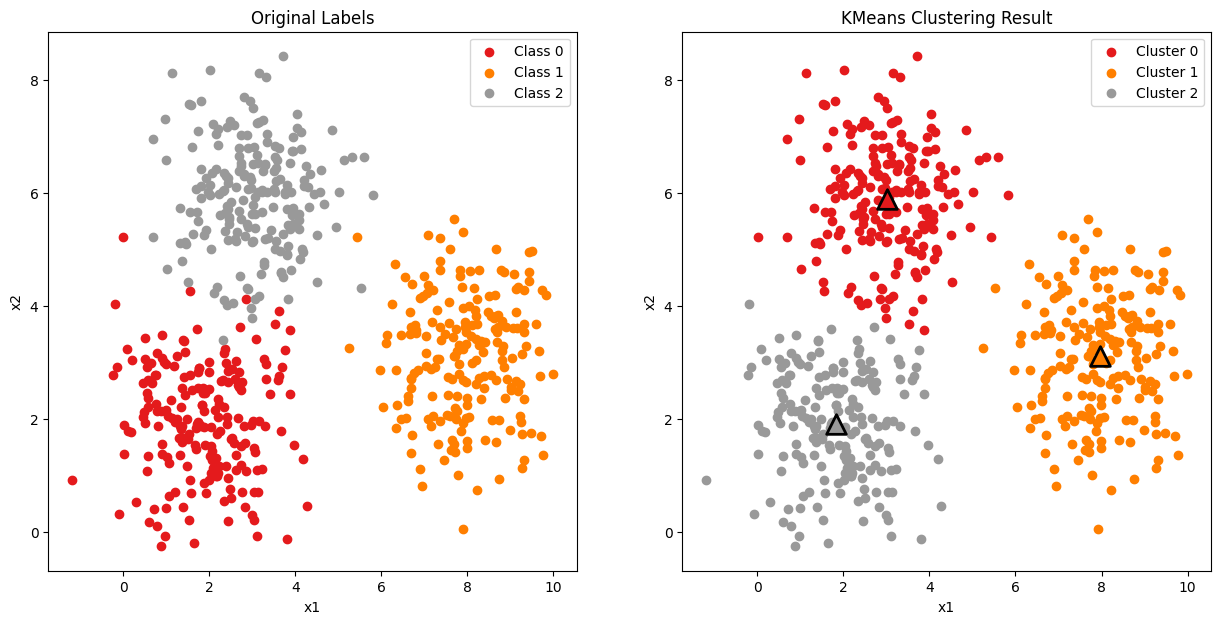

In [30]:
for i, _try in enumerate(tries):
    print(f"Clustering Result for try {i+1}")
    plot_points(X, original_label, _try['labels'][-1], _try['centroids'][-1])

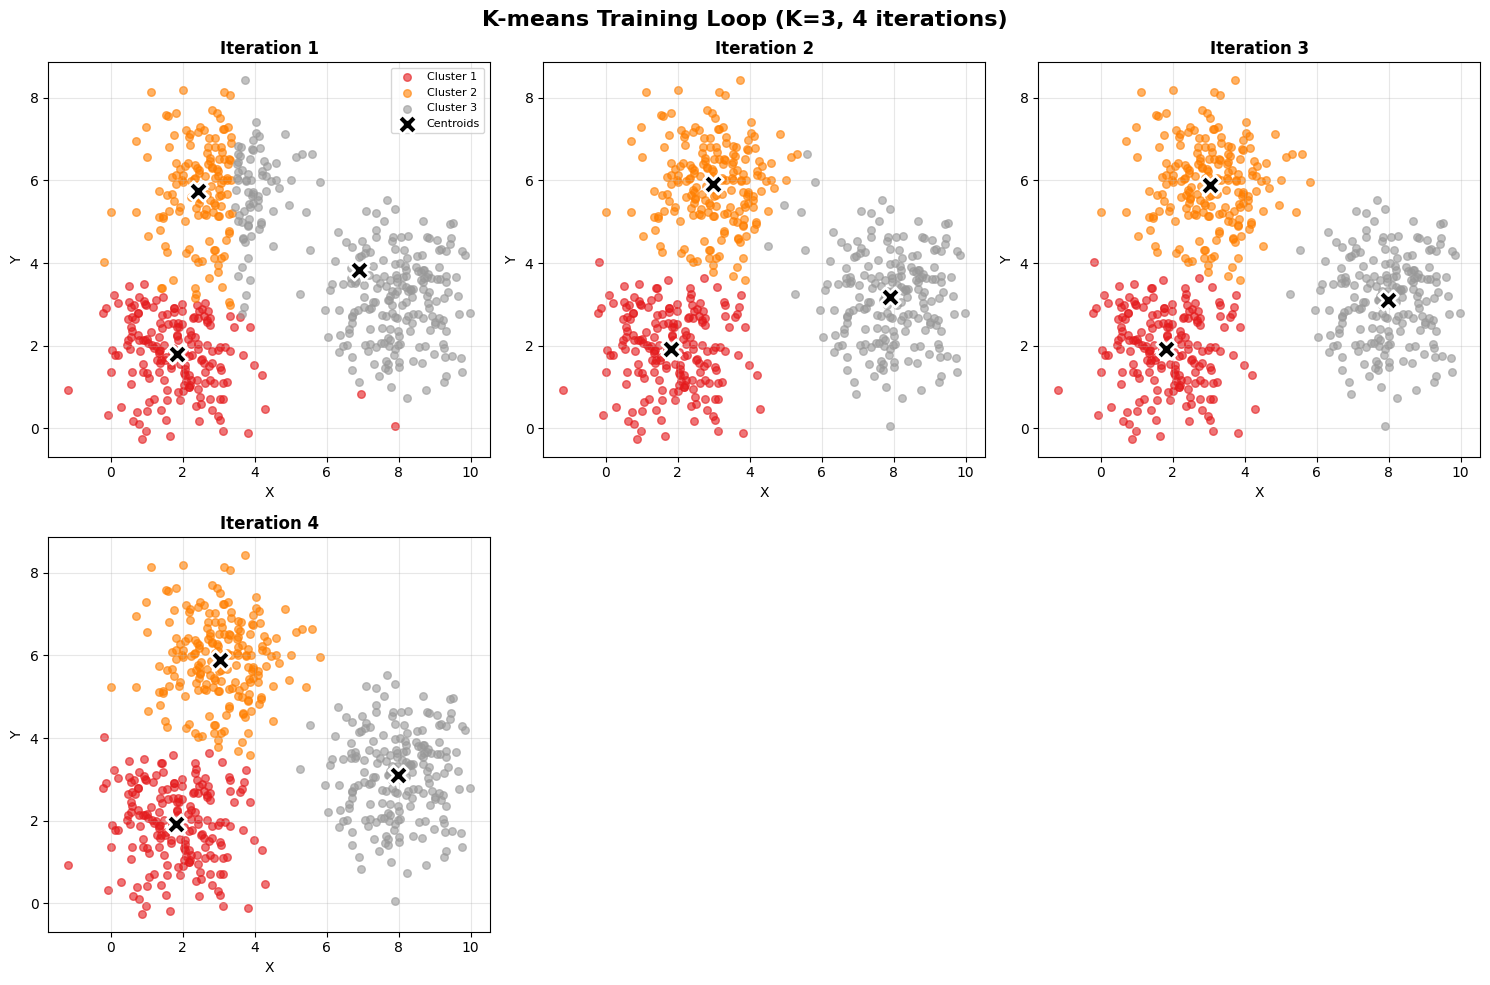

In [32]:
plot_kmeans_iterations(X, tries[0]['centroids'], tries[0]['labels'], K)

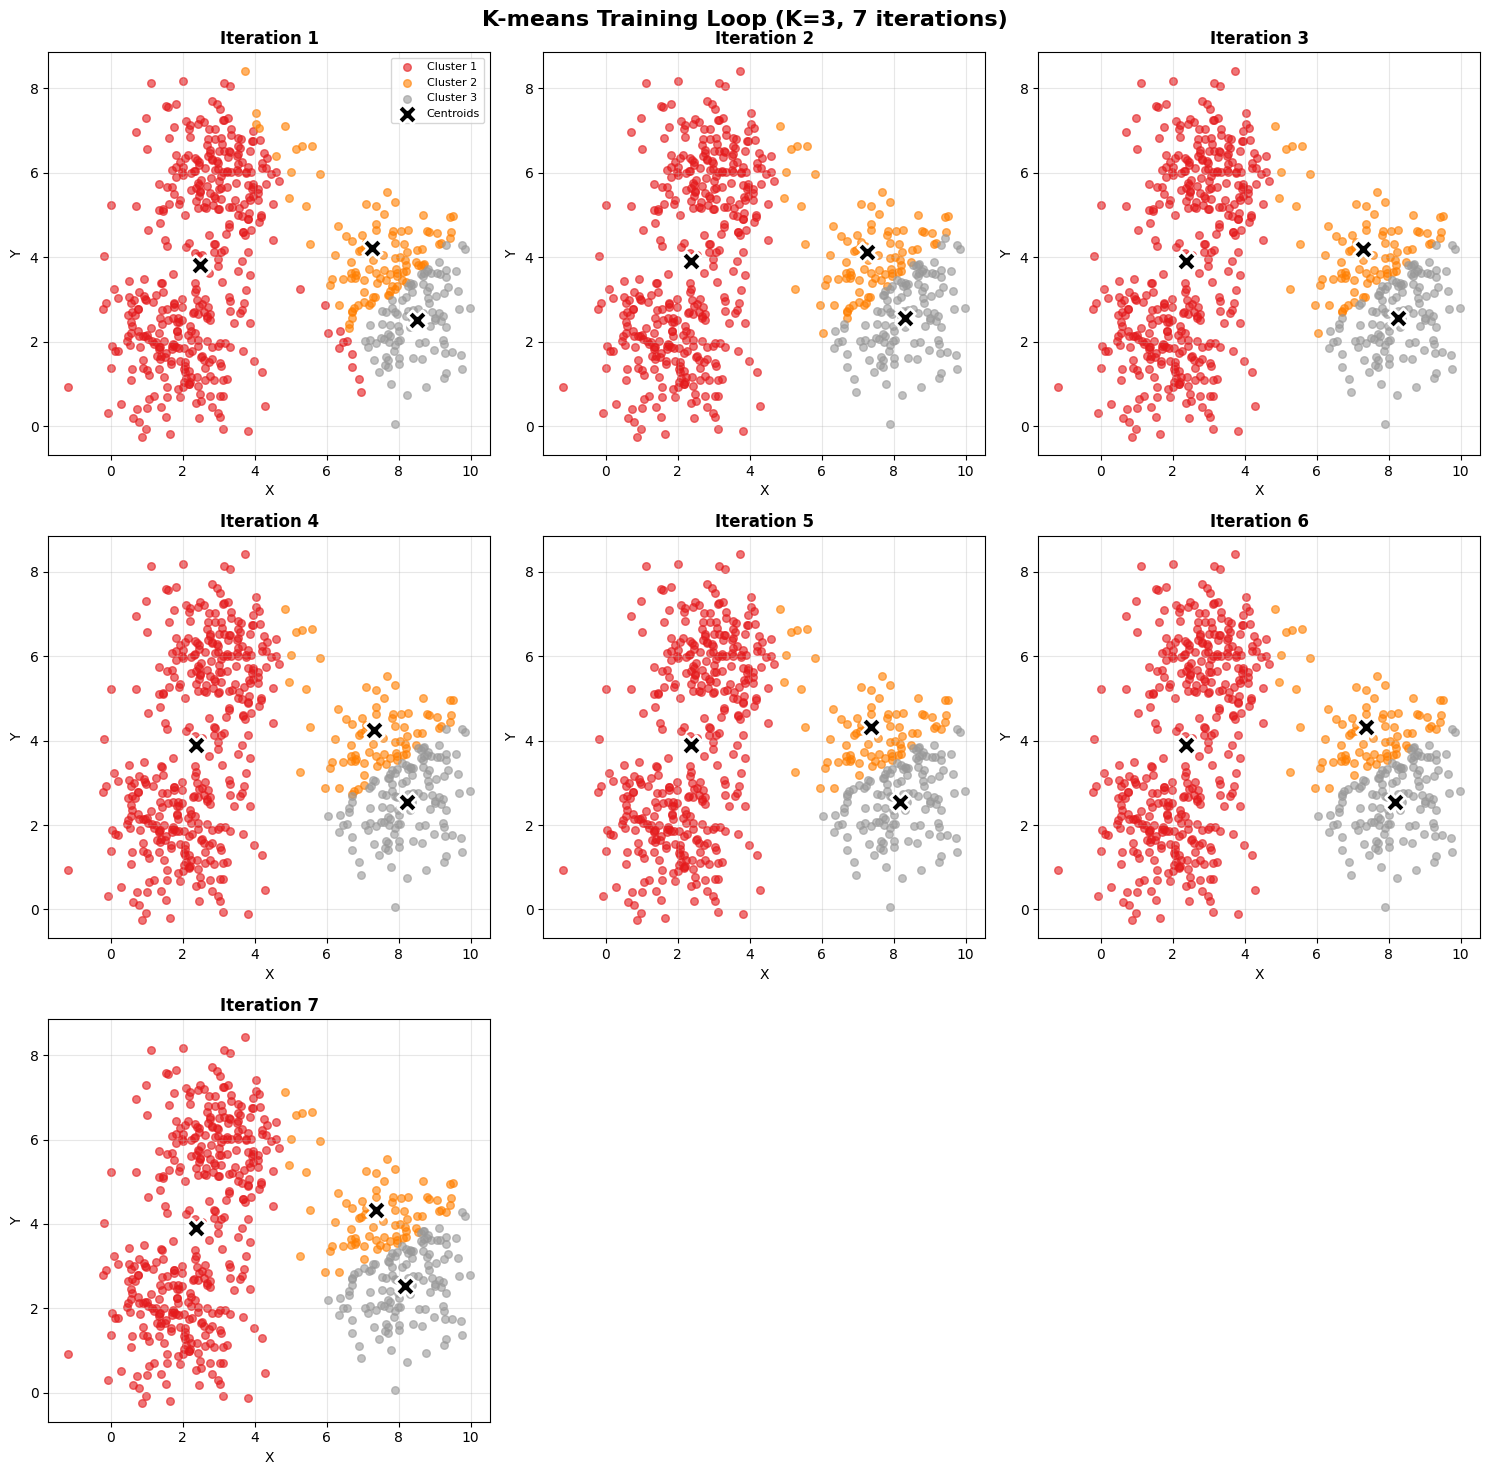

In [33]:
plot_kmeans_iterations(X, tries[2]['centroids'], tries[2]['labels'], K)

**Nhận xét**

- Việc sử dụng KMeans phụ thuộc vào việc khởi tạo các điểm centroids. Khi các centroids được khởi tạo ngẫu nhiên, mỗi lần chạy sẽ có khả năng tạo ra 1 kết quả phân cụm khác nhau.
- Sẽ có các trường hợp centroids được khởi tạo tốt dẫn tới chỉ sau vài vòng lặp, đã có thể đạt kết quả phân cụm tốt, ngược lại cũng có các trường hợp phải sau nhiều vòng lặp, liên tục tính toán và cập nhật lại centroids mới có thể đưa đến kết quả phân cụm cuối cùng.
- Việc khởi tạo ngẫu nhiên các centroids cũng có thể dẫn tới việc mô hình rơi vào cực tiểu địa phương và đưa ra kết quả vô cùng tệ, khác hẳn với phân phối ban đầu.
- Do vậy, KMeans không ổn định khi khởi tạo centroids ngẫu nhiên. Kết quả phụ thuộc rất nhiều vào việc khởi tạo centroids, nếu dùng centroids ngẫu nhiên, ta sẽ không kiểm soát được kết quả của mô hình dẫn tới thi
- Trong thực tế, người ta thường dùng `KMeans++` để cải thiện tính ổn định và chất lượng mô hình.

### **Assignment 2:**
- Generate a toy dataset having $50$ points following the Gaussian distribution $\mathcal{N}((2, 2), \Sigma)$, $20$ points of them following the Gaussian distribution $\mathcal{N}((8, 3), \Sigma)$, and $1000$ points of them following the Gaussian distribution $\mathcal{N}((3, 6), \Sigma)$ where $\Sigma = 
\left(\begin{array}{cc}
    1 & 0 \\
    0 & 1
\end{array}\right)
$.
- Use Numpy only to implement the K-means method for finding three clusters from the toy dataset.
- Train this K-means with EM method.
- Give comments on the effect of different sizes among clusters to the performance of K-means.

In [34]:
means = [[2,2], [8,3], [3,6]]
cov = [[1,0], [0,1]]
N1, N2, N3 = 50, 20, 1000
K = 3

X0 = np.random.multivariate_normal(mean = means[0], cov = cov, size = N1)
X1 = np.random.multivariate_normal(mean = means[1], cov = cov, size = N2)
X2 = np.random.multivariate_normal(mean = means[2], cov = cov, size = N3)

X = np.concatenate((X0, X1, X2), axis = 0)
original_label = np.asarray([0]*N1 + [1]*N2 + [2]*N3).T

In [35]:
n_tries = 5
tries = []

for i in range(n_tries):
    centroids, labels, it = kmeans(X, K)
    tries.append({
        "centroids": centroids,
        "labels": labels,
        "it": it
    })

In [36]:
for i, _try in enumerate(tries):
    print(f"Try {i+1} finished after {_try['it']} iterations")
    print(f"Try {i+1} final centroids:")
    print(_try['centroids'][-1])

Try 1 finished after 20 iterations
Try 1 final centroids:
[[3.17339758 3.53111582]
 [2.18660329 6.16613109]
 [3.82696289 6.20681794]]
Try 2 finished after 34 iterations
Try 2 final centroids:
[[3.71600131 3.10382116]
 [2.16321531 5.59650717]
 [3.54263806 6.46814314]]
Try 3 finished after 11 iterations
Try 3 final centroids:
[[2.2884285  3.86927328]
 [2.53435335 6.45847375]
 [4.272636   5.60093878]]
Try 4 finished after 18 iterations
Try 4 final centroids:
[[4.47731187 5.36777941]
 [2.19283988 4.22011437]
 [2.73003187 6.53696202]]
Try 5 finished after 13 iterations
Try 5 final centroids:
[[2.20184101 4.19342203]
 [2.60491388 6.58264517]
 [4.2775831  5.57025416]]


Clustering Result for try 1


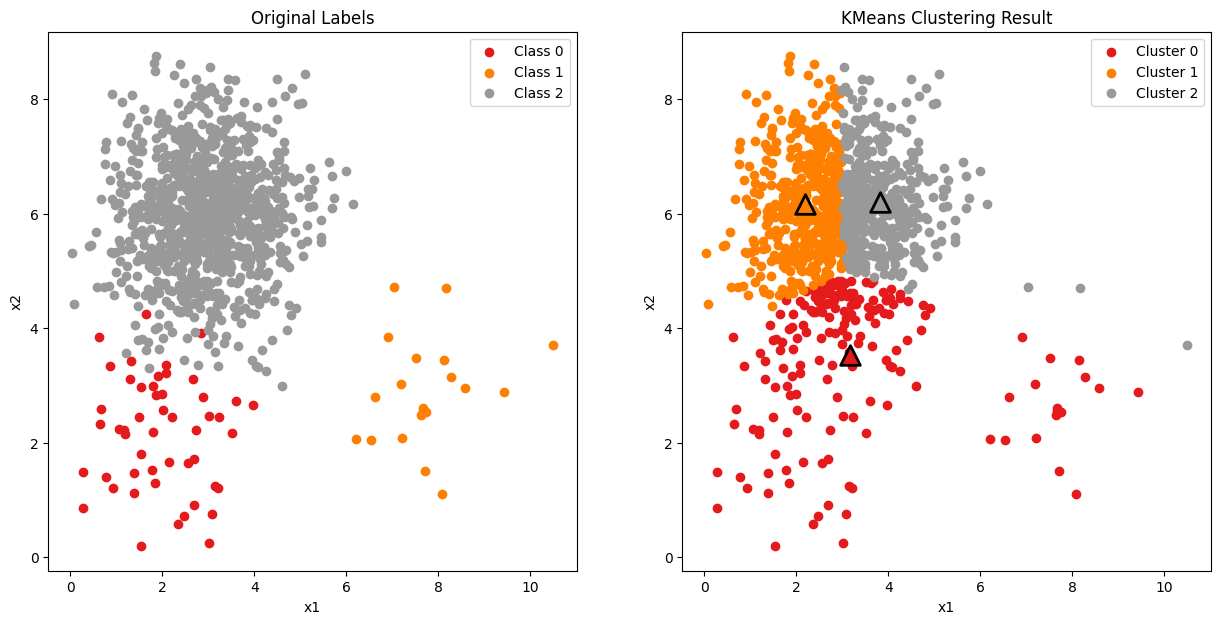

Clustering Result for try 2


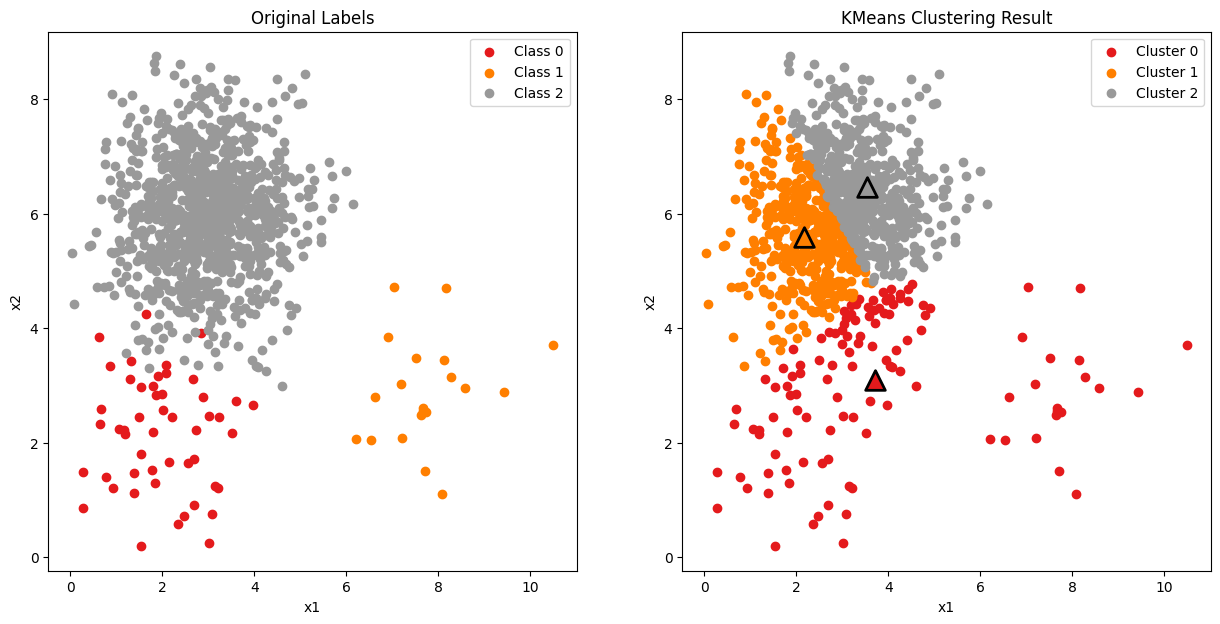

Clustering Result for try 3


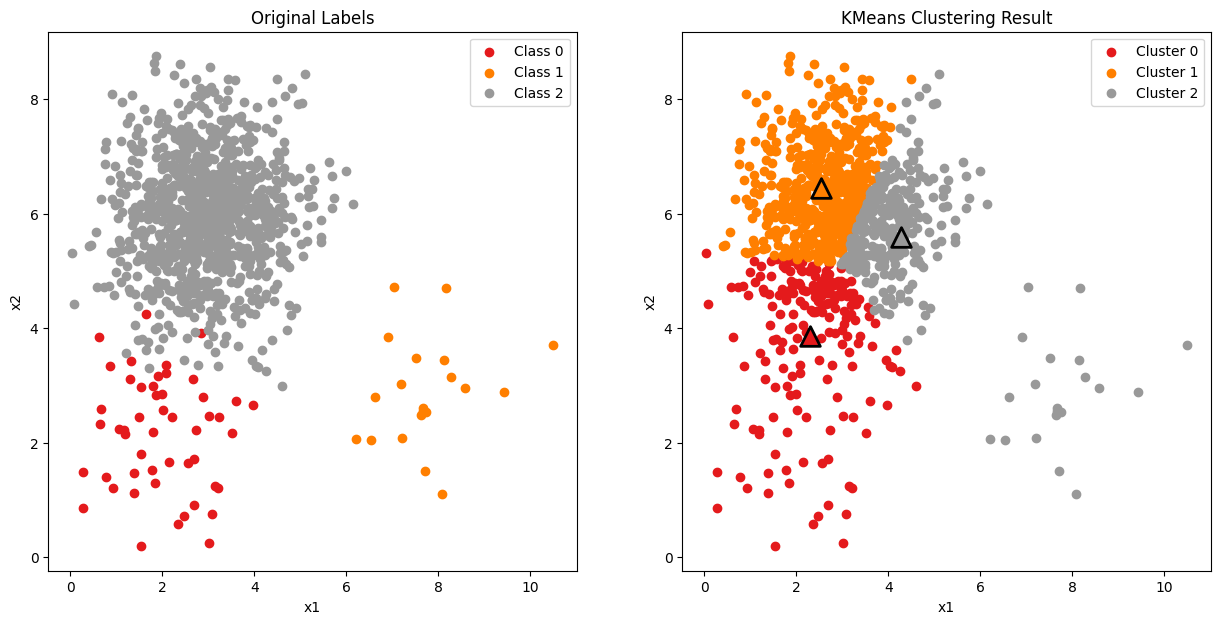

Clustering Result for try 4


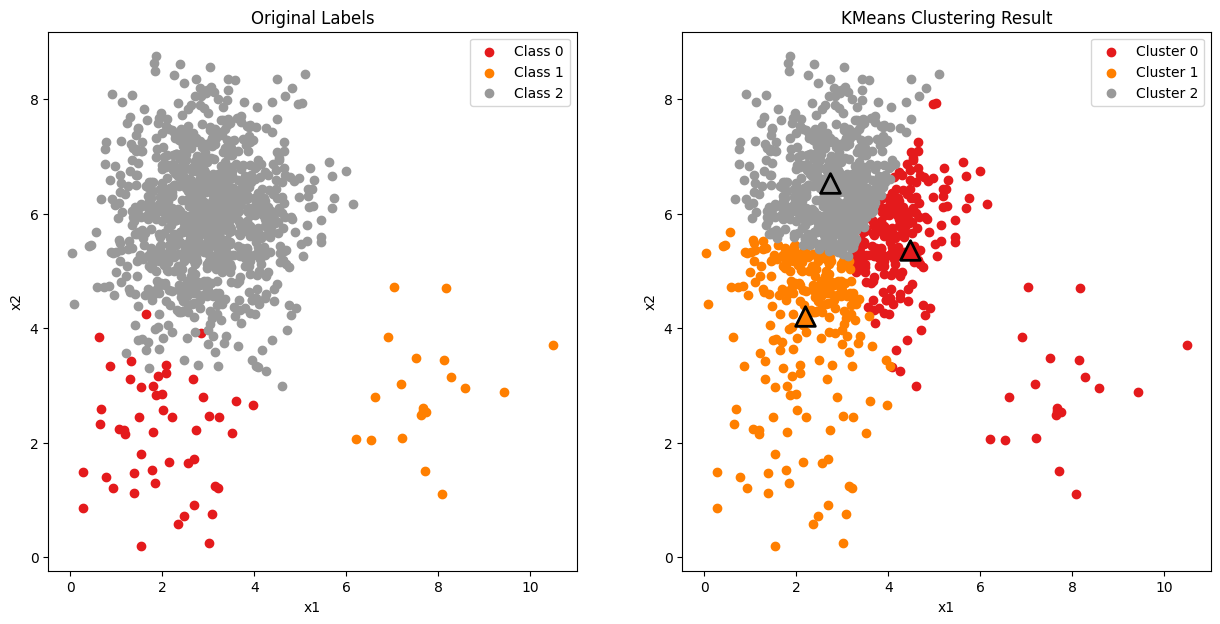

Clustering Result for try 5


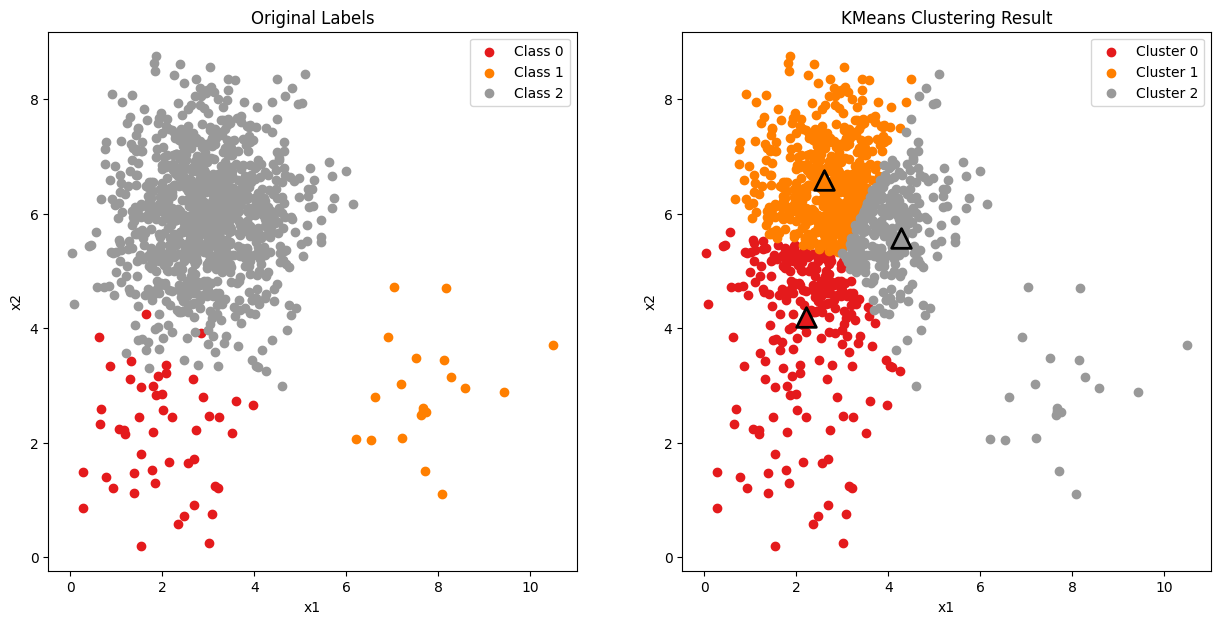

In [37]:
for i, _try in enumerate(tries):
    print(f"Clustering Result for try {i+1}")
    plot_points(X, original_label, _try['labels'][-1], _try['centroids'][-1])

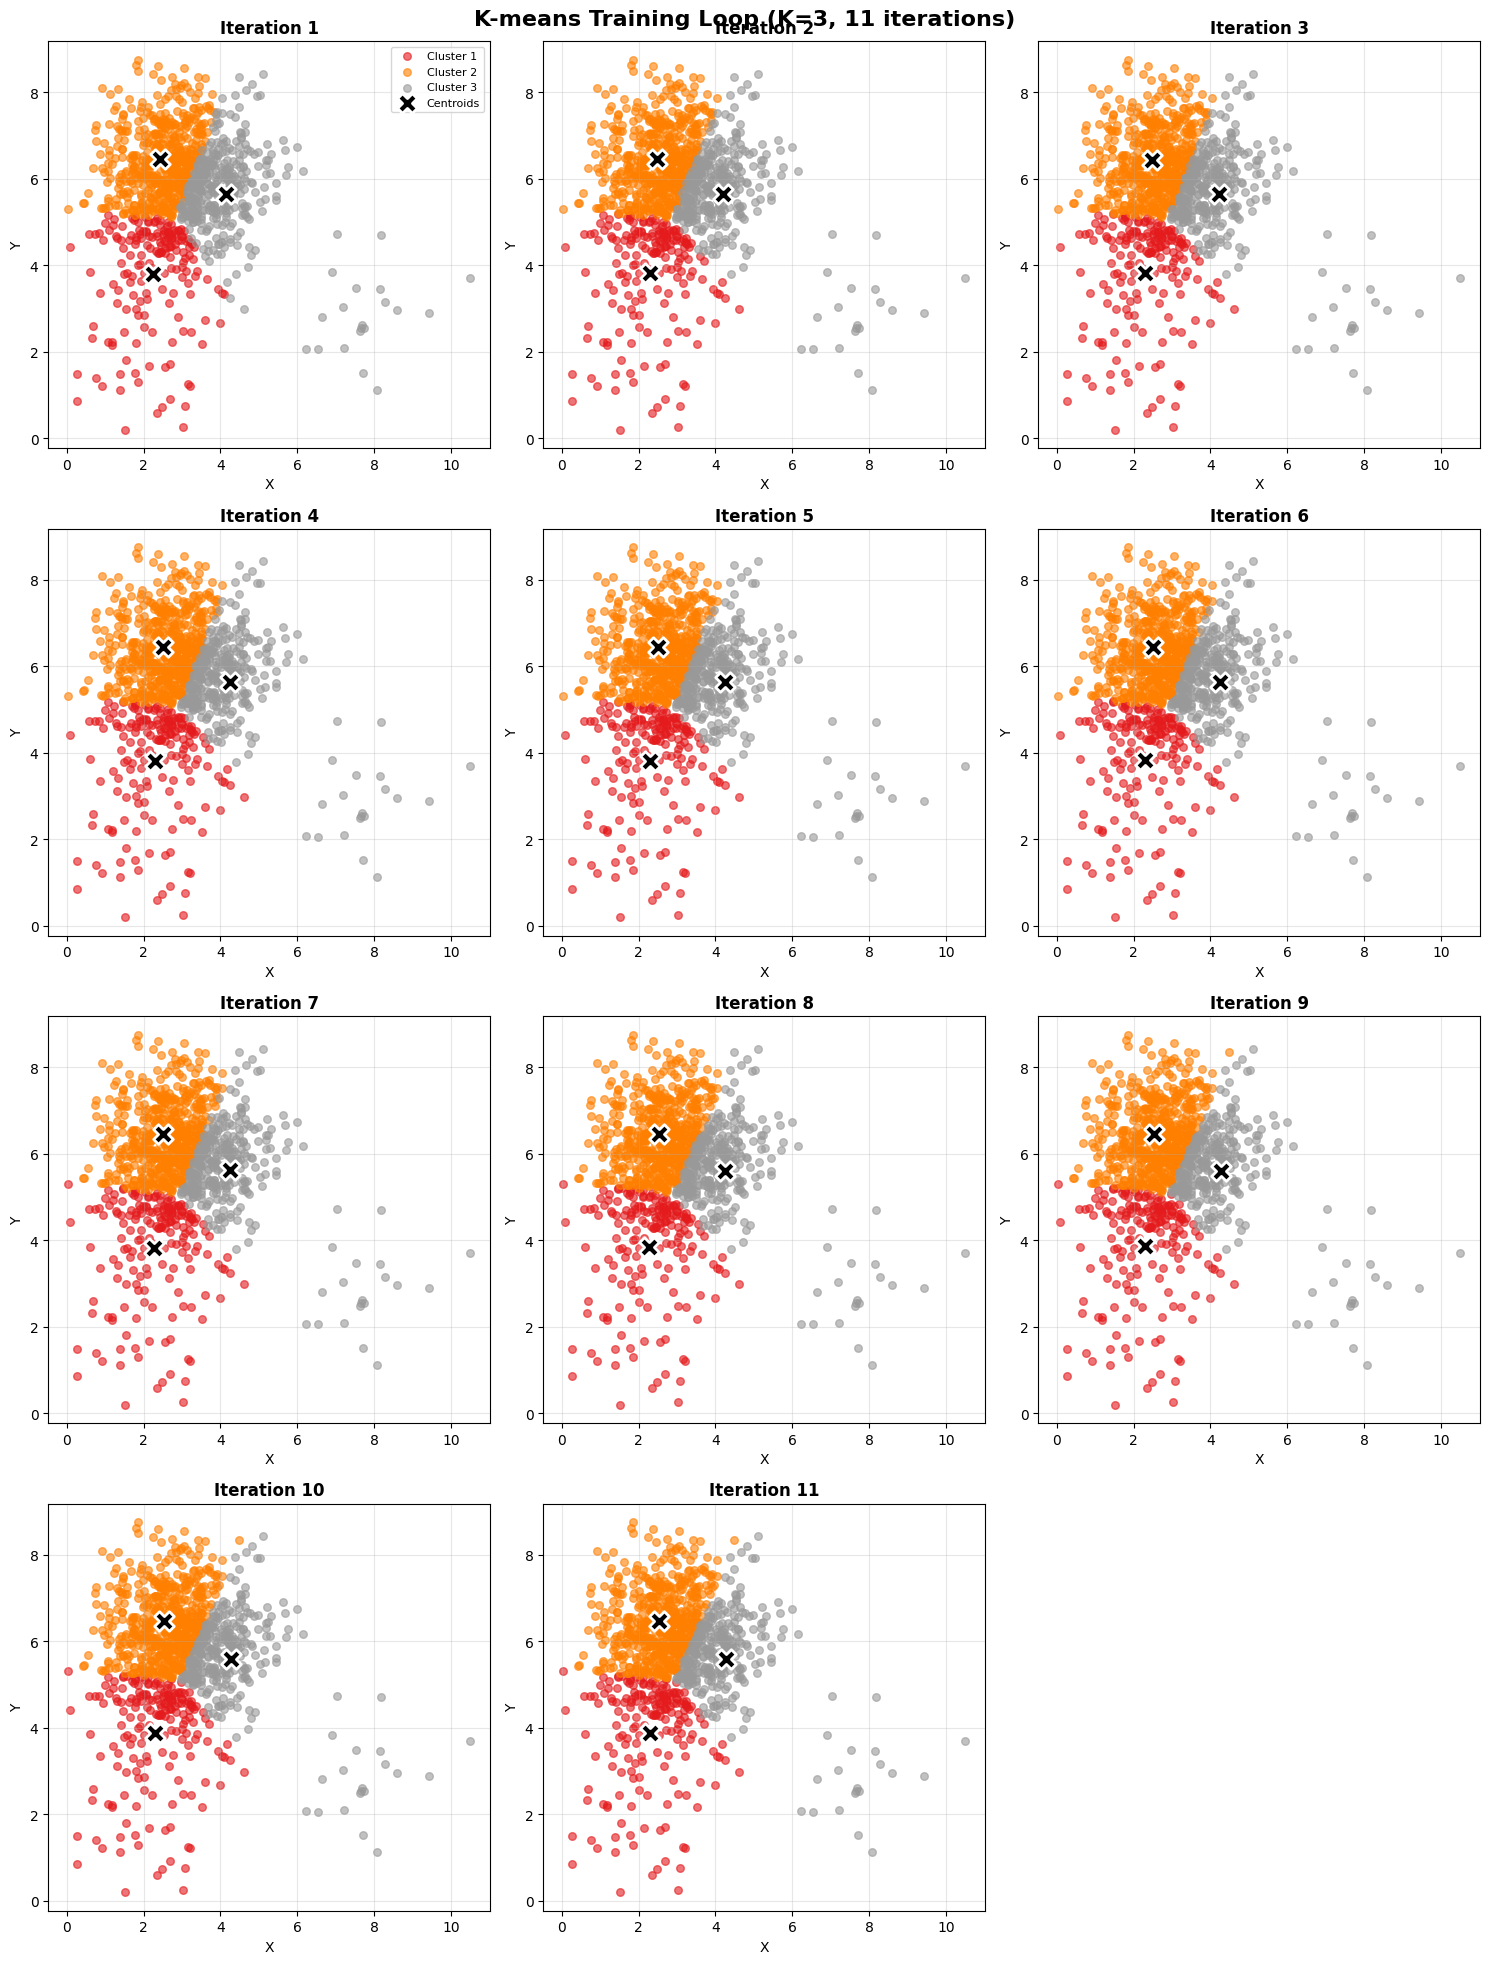

In [39]:
plot_kmeans_iterations(X, tries[2]['centroids'], tries[2]['labels'], K)

**Nhận xét**

- Đối với việc mất cân bằng quá lớn giữa các cụm, KMeans thường có xu hướng tối ưu quanh cụm lớn nhất để giảm tổng bình phương khoảng cách, dẫn tới các centroids sẽ tập trung quanh cụm lớn nhất và bỏ qua các cụm có kích thước quá nhỏ. Bên cạnh đó, do số lượng dữ liệu lớn hơn dẫn tới xác suất điểm khởi tạo rơi vào cụm lớn nhất cũng rất lớn dẫn tới các centroids khởi tạo cũng sẽ vây quanh cụm này. Đồng thời kết quả các lần chạy không ổn định về cả kết quả cuối cùng lẫn quá trình huấn luyện.
- Cụm thứ 3 với 1000 điểm dữ liệu hoàn toàn chi phối quá trình huấn luyện, khiến các cụm nhỏ bị gộp và cụm lớn, centroids lệch xa với thực tế, hiệu quả mô hình không ổn định.
- Do vậy, KMeans rất nhạy cảm và hoạt động kém với trường hợp dữ liệu mất cân bằng.

### **Assignment 3:**

- Generate a toy dataset having $600$ data points, $200$ points of them following the Gaussian distribution $\mathcal{N}((2, 2), \Sigma_1)$, $200$ points of them following the Gaussian distribution $\mathcal{N}((8, 3), \Sigma_1)$, and $200$ points of them following the Gaussian distribution $\mathcal{N}((3, 6), \Sigma_2)$ where 

$$
    \Sigma_1 = 
    \left(\begin{array}{cc}
        1 & 0 \\
        0 & 1
    \end{array}\right)
$$ 

and

$$
\Sigma_2 = 
    \left(\begin{array}{cc}
        10 & 0 \\
        0 & 1
    \end{array}\right)
$$.

- Use Numpy only to implement the K-means method for finding three clusters from the toy dataset.
- Train this K-means with EM method.
- Give comments on the effect of distribution $\mathcal{N}((3, 6), \Sigma_2)$ to the performance of K-means.

In [50]:
means = [[2,2], [8,3], [3,6]]
cov1 = [[1,0], [0,1]]
cov2 = [[10,0], [0,1]]

N1 = N2 = N3 = 200
K = 3

X0 = np.random.multivariate_normal(mean = means[0], cov = cov1, size = N1)
X1 = np.random.multivariate_normal(mean = means[1], cov = cov1, size = N2)
X2 = np.random.multivariate_normal(mean = means[2], cov = cov2, size = N3)

X = np.concatenate((X0, X1, X2), axis = 0)
original_label = np.asarray([0]*N1 + [1]*N2 + [2]*N3).T

In [51]:
n_tries = 5
tries = []

for i in range(n_tries):
    centroids, labels, it = kmeans(X, K)
    tries.append({
        "centroids": centroids,
        "labels": labels,
        "it": it
    })

In [52]:
for i, _try in enumerate(tries):
    print(f"Try {i+1} finished after {_try['it']} iterations")
    print(f"Try {i+1} final centroids:")
    print(_try['centroids'][-1])

Try 1 finished after 6 iterations
Try 1 final centroids:
[[2.14382163 1.99726112]
 [1.40538225 6.09195199]
 [7.77195431 3.41703307]]
Try 2 finished after 6 iterations
Try 2 final centroids:
[[7.73720974 3.44285483]
 [2.14382163 1.99726112]
 [1.33549516 6.10275839]]
Try 3 finished after 9 iterations
Try 3 final centroids:
[[7.87194052 3.29575574]
 [2.13377624 1.98573233]
 [1.66712935 6.0917909 ]]
Try 4 finished after 16 iterations
Try 4 final centroids:
[[1.66712935 6.0917909 ]
 [7.87194052 3.29575574]
 [2.13377624 1.98573233]]
Try 5 finished after 6 iterations
Try 5 final centroids:
[[7.87194052 3.29575574]
 [1.66712935 6.0917909 ]
 [2.13377624 1.98573233]]


Clustering Result for try 1


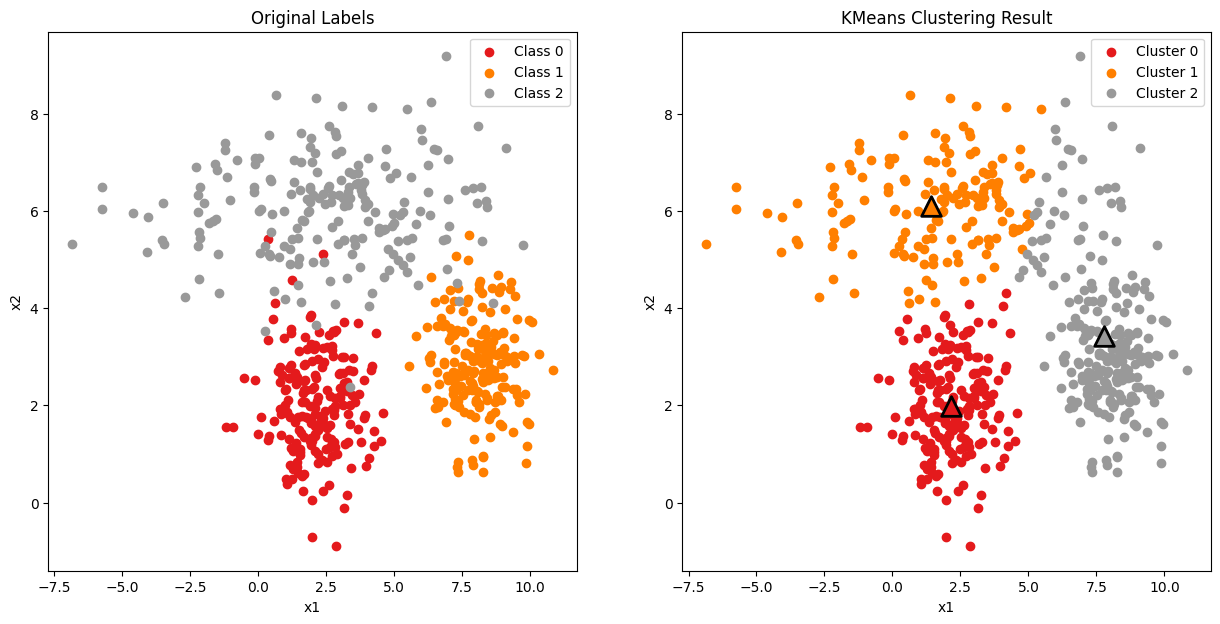

Clustering Result for try 2


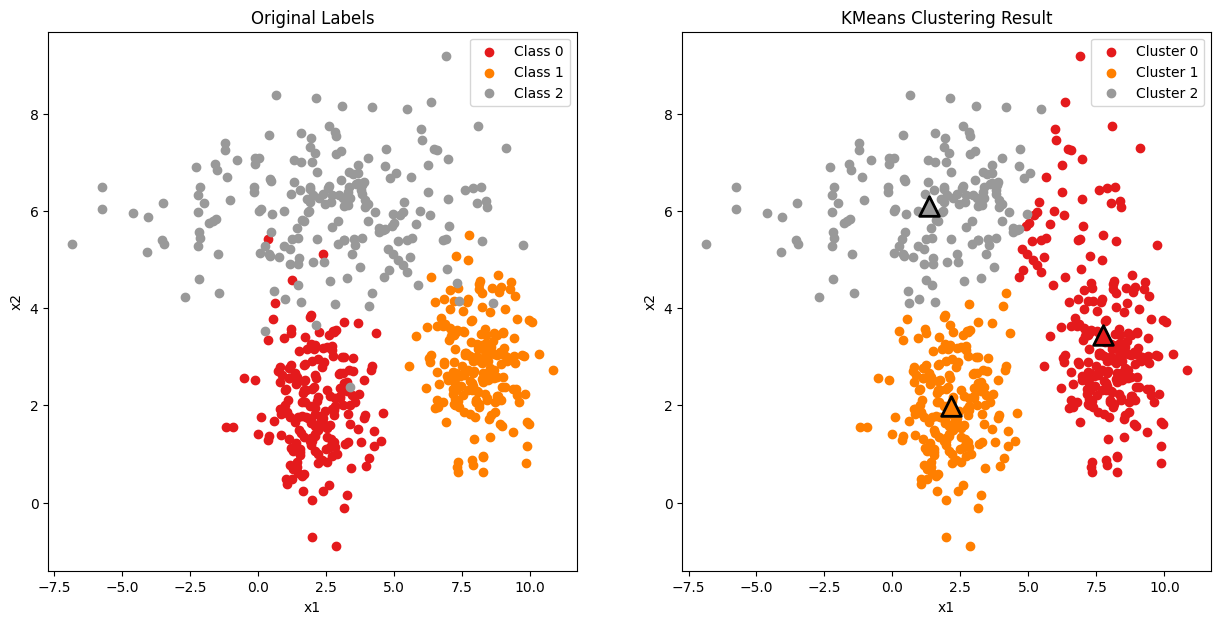

Clustering Result for try 3


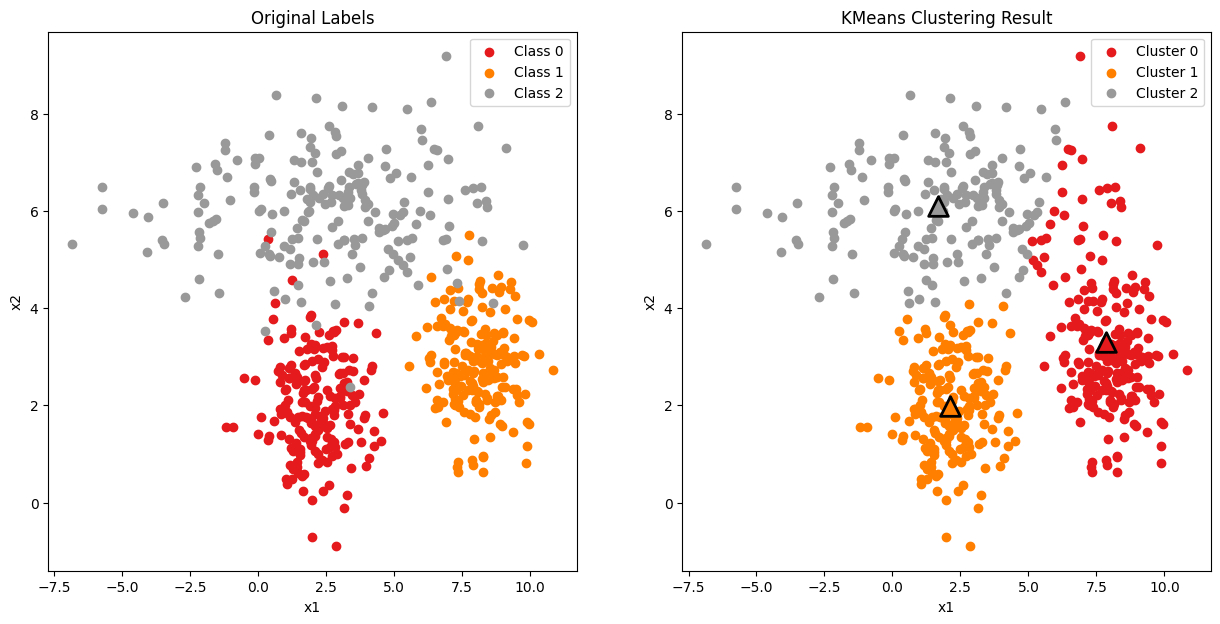

Clustering Result for try 4


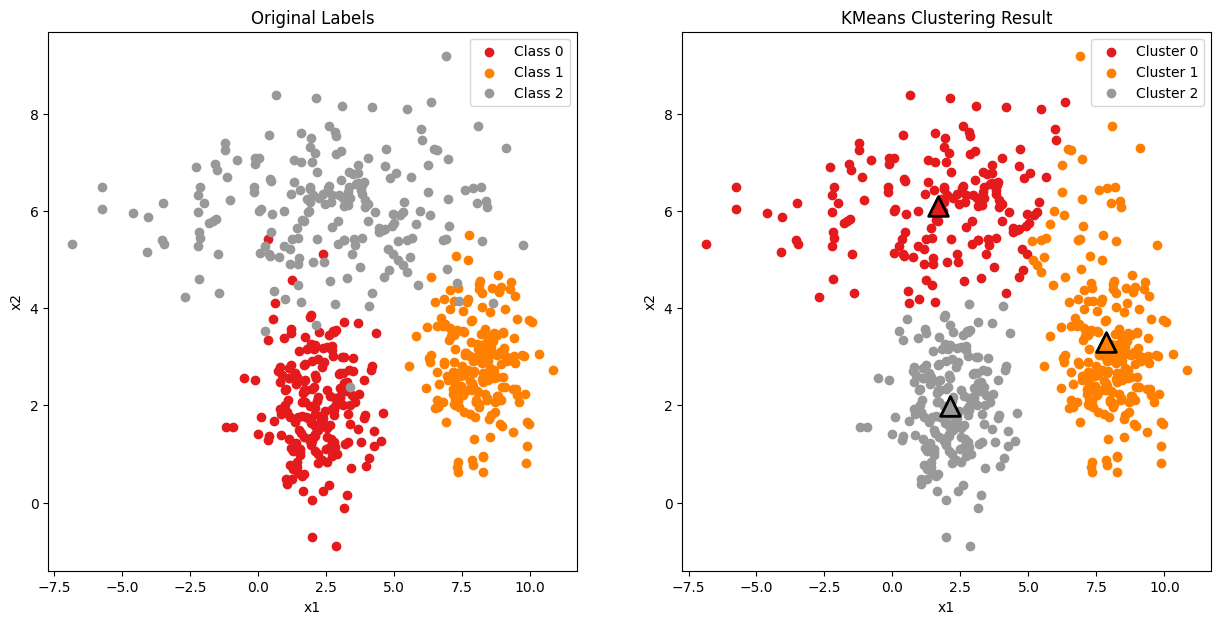

Clustering Result for try 5


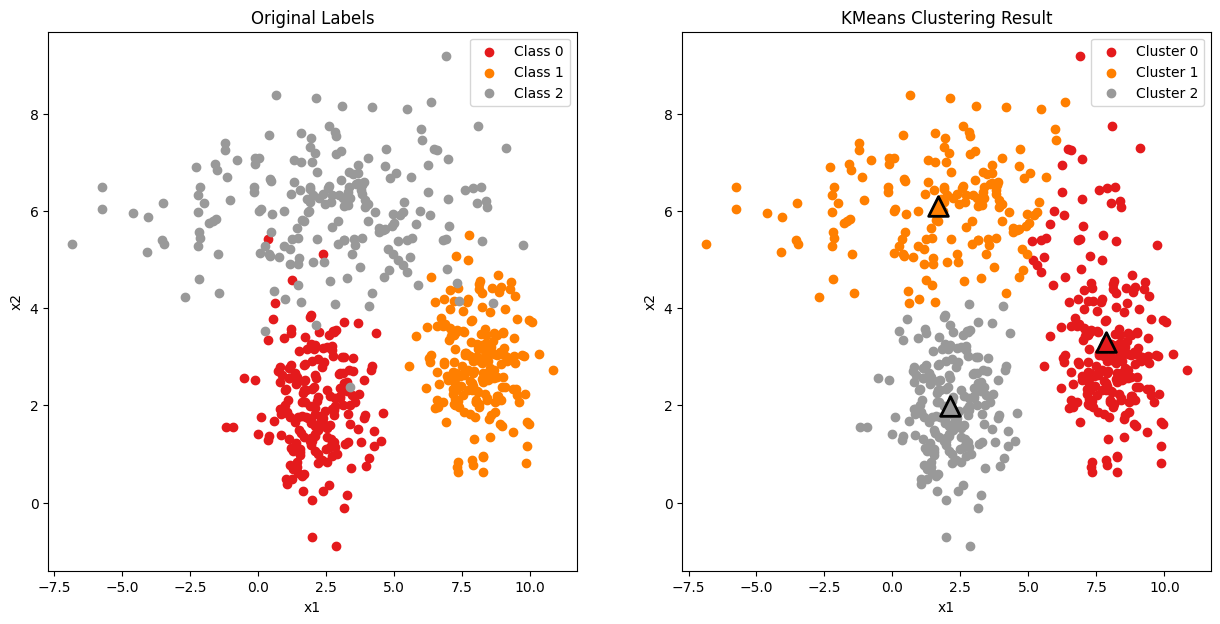

In [53]:
for i, _try in enumerate(tries):
    print(f"Clustering Result for try {i+1}")
    plot_points(X, original_label, _try['labels'][-1], _try['centroids'][-1])

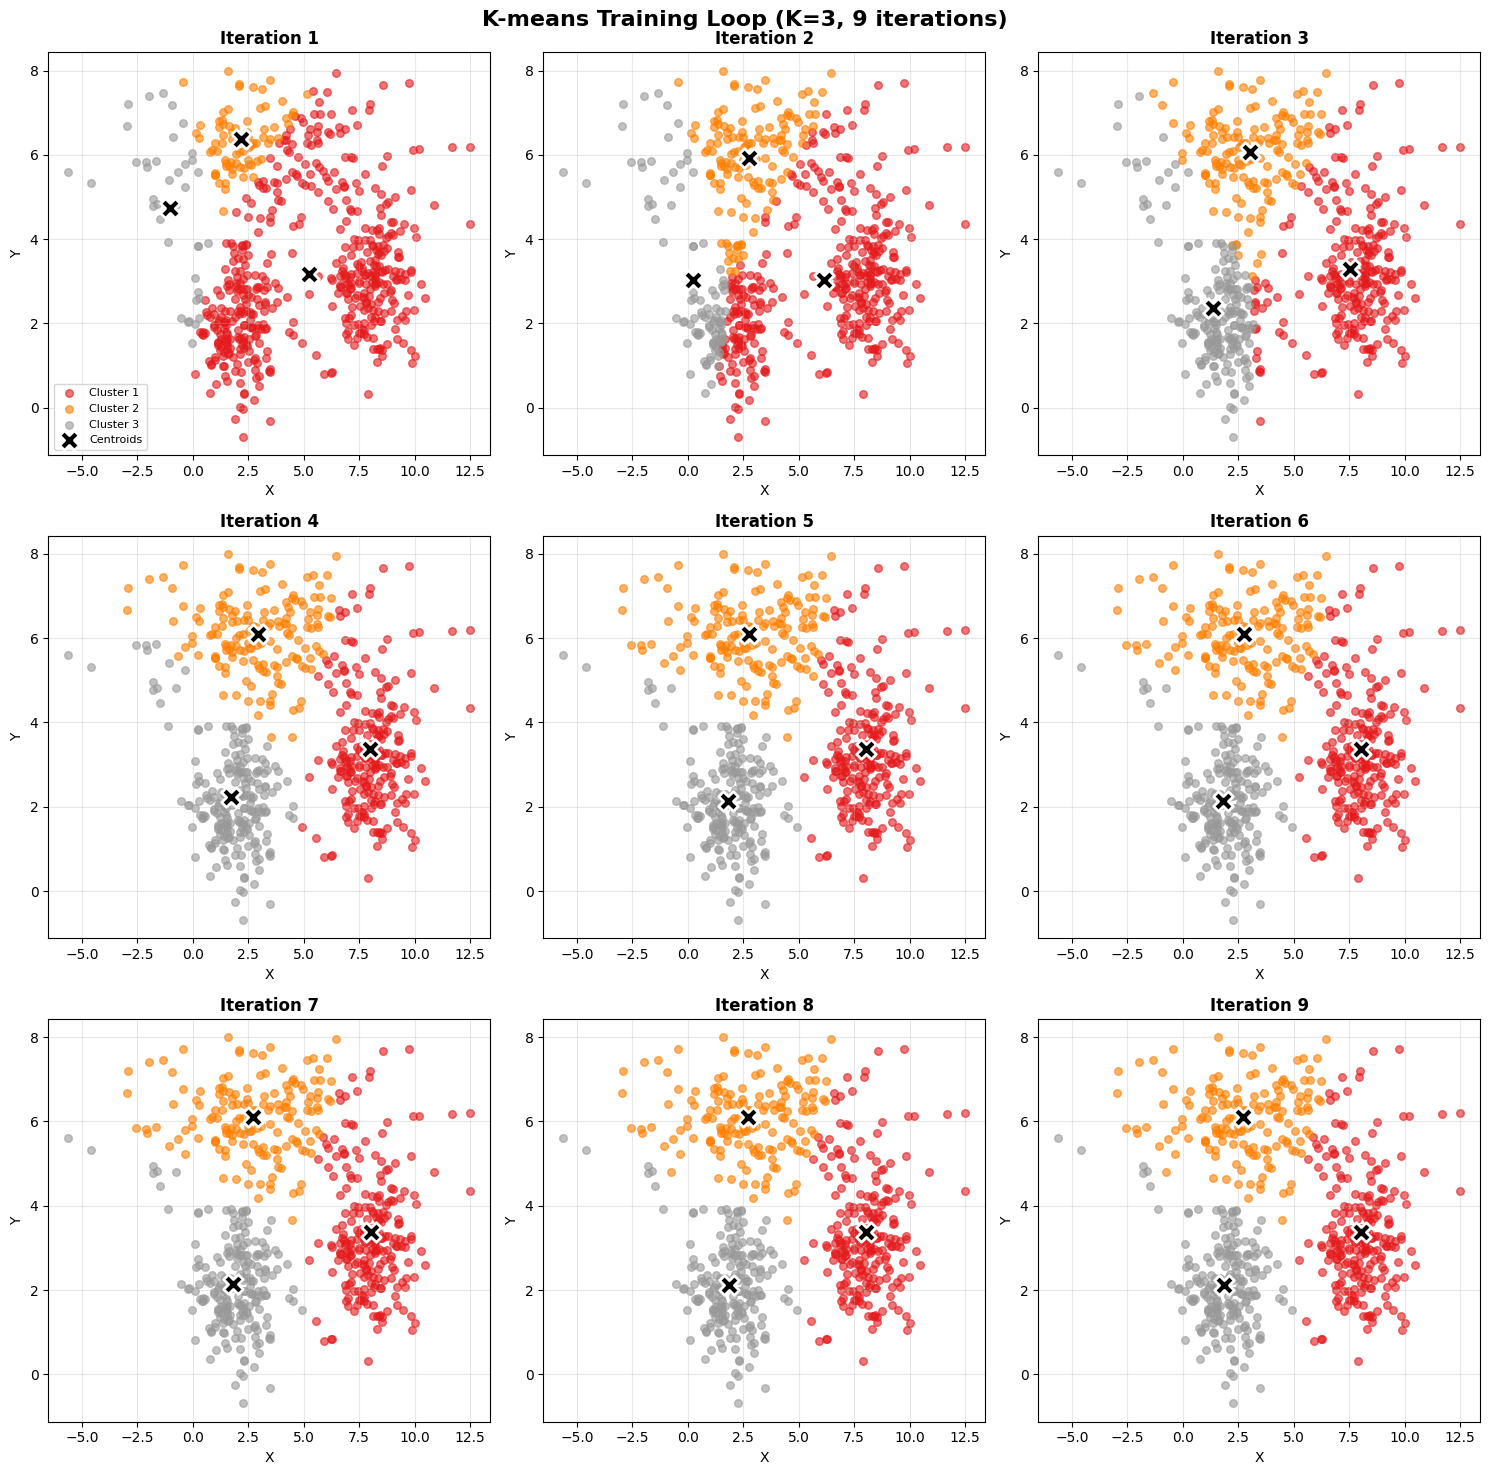

In [44]:
plot_kmeans_iterations(X, tries[2]['centroids'], tries[2]['labels'], K)

**Nhận xét**

- KMeans vẫn tìm được centroids của các cụm, tuy nhiên do phương sai theo trục x của cụm 3 quá lớn và bị trải dài theo chiều ngang, dẫn tới loss trong cụm này khá lớn và sẽ có các điểm ở ngoài biên của cụm này bị gom nhầm vào cụm khác.
- Đồng thời KMeans giả sử các cụm có dạng hình cầu và hiệp phương sai tương đương nhau, do vậy việc phân phối dữ liệu không đều dạng cầu mà có dạng đường ngang, elip,... sẽ khiến cho KMeans hoạt động kém đi, gây sai sót trong việc phân cụm.
- Do vậy, KMeans cũng chịu ảnh hưởng rất lớn từ hình dạng và cấu trúc phân phối của dữ liệu.

## Tổng kết

- KMeans là 1 thuật toán gom cụm thuộc nhóm Unsupervised learning, hỗ trợ việc gom cụm và phân lớp dữ liệu dựa trên các đặc trưng và sự tương đồng (theo khoảng cách) giữa các điểm dữ liệu trong cụm.
- KMeans rất nhạy cảm với kích thước các cụm, việc khởi tạo centroids cũng như hình dạng phân phối các cụm. Việc mất cân bằng dữ liệu hay khởi tạo ngẫu nhiên, cụm có hiệp phương sai lớn có thể khiến cho KMeans hoạt động kém, bất ổn định và dẫn tới kết quả gom cụm sai với thực tế.